<a href="https://colab.research.google.com/github/uhyozzy/multi_semiproject/blob/main/step2_%ED%91%9C%EC%A4%80%ED%99%94%ED%9B%84_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84(heatmap%2Cpairplot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import unicodedata

# **파일 준비**

In [2]:
import chardet
with open("/content/교통사고_데이터_표준화.csv", mode='rb') as f:
  d = f.readline()
print(chardet.detect(d))

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
df = pd.read_csv("/content/교통사고_데이터_표준화.csv",encoding='utf-8')
df

,자치구,날짜,[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),사고[건]
0,종로,20180601,-1.300546,-0.339496,-0.007579
1,종로,20180602,-1.304192,-0.339496,-0.007579
2,종로,20180603,-1.315528,-0.339496,-0.360439
3,종로,20180604,-1.306164,-0.339496,-0.713300
4,종로,20180605,-1.306034,-0.339496,1.403863
...,...,...,...,...,...
11495,강동,20220827,-0.298097,0.034392,0.698142
11496,강동,20220828,-0.418113,-0.279674,-0.007579
11497,강동,20220829,-0.354807,-0.275187,-0.713300
11498,강동,20220830,0.053846,-0.225834,0.345282


**각 컬럼별 결측치 확인**

In [4]:
df.isnull()
df.isnull().sum()

자치구                   0
날짜                    0
[AVG] 하수관로 비율(%)    213
[MAX] 하수관로 비율(%)    213
사고[건]                 0
dtype: int64

**데이터프레임의 누락데이터 제거**

In [5]:
#누락데이터가 하나라도 포함된 행은 삭제
df.dropna(how='any', axis=0, inplace=True)
# df의 결측치 제거확인
df.isnull().sum()

자치구                 0
날짜                  0
[AVG] 하수관로 비율(%)    0
[MAX] 하수관로 비율(%)    0
사고[건]               0
dtype: int64

# **데이터 나누기**

In [6]:
y1 = df['자치구']
print(y1.unique())

['종로' '중' '용산' '성동' '광진' '동대문' '중랑' '성북' '강북' '도봉' '노원' '은평' '서대문' '마포'
 '양천' '강서' '구로' '금천' '영등포' '동작' '관악' '서초' '강남' '송파' '강동']


# **상관관계 확인하기**

In [7]:
new_df = df.iloc[:, 2:]
new_df

,[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),사고[건]
0,-1.300546,-0.339496,-0.007579
1,-1.304192,-0.339496,-0.007579
2,-1.315528,-0.339496,-0.360439
3,-1.306164,-0.339496,-0.713300
4,-1.306034,-0.339496,1.403863
...,...,...,...
11495,-0.298097,0.034392,0.698142
11496,-0.418113,-0.279674,-0.007579
11497,-0.354807,-0.275187,-0.713300
11498,0.053846,-0.225834,0.345282


In [8]:
new_df.corr()

,[AVG] 하수관로 비율(%),[MAX] 하수관로 비율(%),사고[건]
[AVG] 하수관로 비율(%),1.000000,0.168335,0.117504
[MAX] 하수관로 비율(%),0.168335,1.000000,0.052532
사고[건],0.117504,0.052532,1.000000


## **heatmap 시각화**

In [9]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [10]:
  import matplotlib.pyplot as plt

  plt.rc('font', family='NanumBarunGothic')

Text(0.5, 1.0, '하수관로비율과 교통사고건수의 관계')

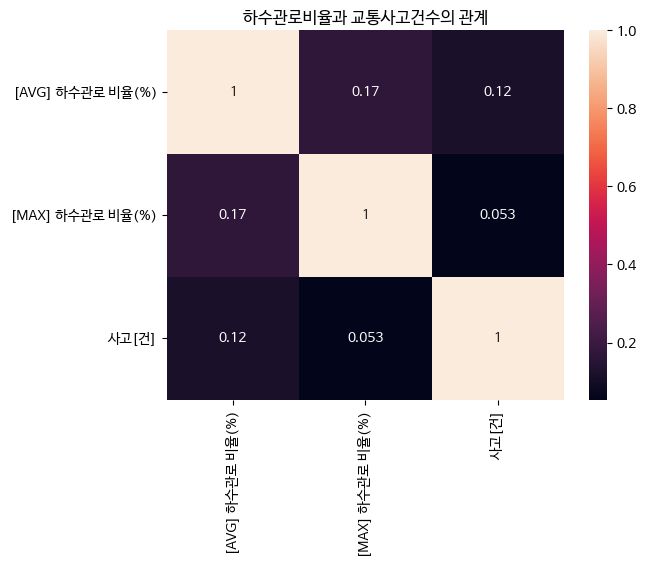

In [11]:
sns.heatmap(new_df.corr(), annot=True)
plt.title('하수관로비율과 교통사고건수의 관계')

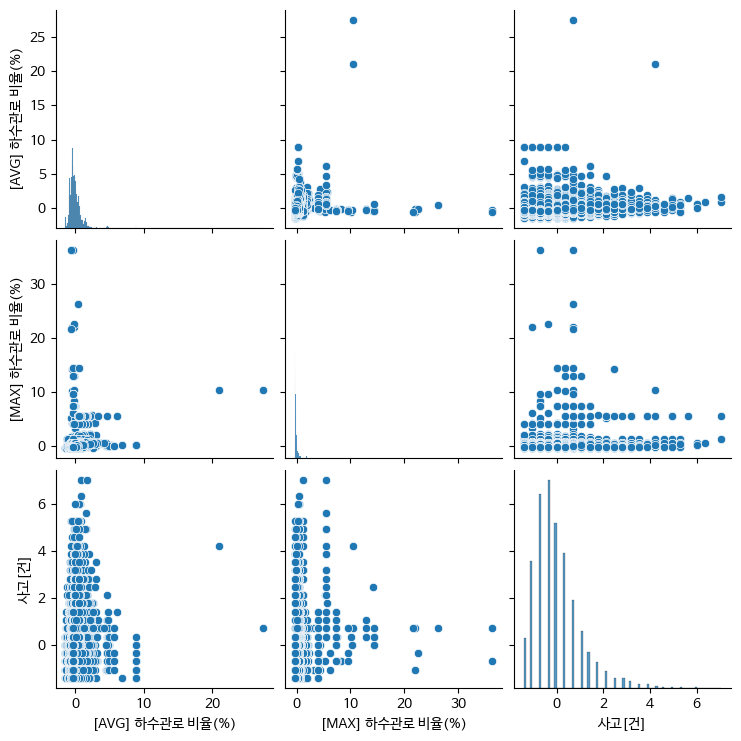

In [12]:
sns.pairplot(new_df)